<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    87.475033  66.715400  51.489544  ...  219.337969  215.255582   4.082387
      1.0    31.091283  87.830877  60.512343  ...  179.467103  189.796370 -10.329267
      2.0    41.673619  84.765264  60.369906  ...  185.422127  197.017157 -11.595030
      3.0    34.048050  21.730295  87.669256  ...  156.266521  152.030044   4.236478
      4.0    68.782729  62.274988  57.094183  ...  193.261443  197.717050  -4.455607
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  77.553445  21.504820  88.352726  ...  199.668328  196.263106   3.405222
      246.0  73.450426  84.105862  90.075440  ...  259.499639  257.936612   1.563027
      247.0  71.363747  61.993677  79.074206  ...  216.758837  222.386576  -5.627739
      248.0  54.890410  61.979128  25.660933  ...  145.314741  153.351804  -8.037063
      249.0  61.210919  99.533688  88.268787  ...  257.032501  259.539433  -2.506932

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    87.475033  66.715400  51.489544  ...  219.337969  215.255582   4.082387
      1.0    31.091283  87.830877  60.512343  ...  179.467103  189.796370 -10.329267
      2.0    41.673619  84.765264  60.369906  ...  185.422127  197.017157 -11.595030
      3.0    34.048050  21.730295  87.669256  ...  156.266521  152.030044   4.236478
      4.0    68.782729  62.274988  57.094183  ...  193.261443  197.717050  -4.455607
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  77.553445  21.504820  88.352726  ...  199.668328  196.263106   3.405222
      246.0  73.450426  84.105862  90.075440  ...  259.499639  257.936612   1.563027
      247.0  71.363747  61.993677  79.074206  ...  216.758837  222.386576  -5.627739
      248.0  54.890410  61.979128  25.660933  ...  145.314741  153.351804  -8.037063
      249.0  61.210919  99.533688  88.268787  ...  257.032501  259.539433  -2.506932

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.475033,66.715400,51.489544,3.657993,219.337969,215.255582,4.082387
1,0.0,1.0,31.091283,87.830877,60.512343,-9.967401,179.467103,189.796370,-10.329267
2,0.0,2.0,41.673619,84.765264,60.369906,-11.386662,185.422127,197.017157,-11.595030
3,0.0,3.0,34.048050,21.730295,87.669256,2.818921,156.266521,152.030044,4.236478
4,0.0,4.0,68.782729,62.274988,57.094183,-4.890458,193.261443,197.717050,-4.455607
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.553445,21.504820,88.352726,2.257337,199.668328,196.263106,3.405222
249996,999.0,246.0,73.450426,84.105862,90.075440,1.867910,259.499639,257.936612,1.563027
249997,999.0,247.0,71.363747,61.993677,79.074206,-5.672793,216.758837,222.386576,-5.627739
249998,999.0,248.0,54.890410,61.979128,25.660933,-7.215730,145.314741,153.351804,-8.037063


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    87.475033  66.715400  51.489544  ...  219.337969  215.255582   4.082387
      1.0    31.091283  87.830877  60.512343  ...  179.467103  189.796370 -10.329267
      2.0    41.673619  84.765264  60.369906  ...  185.422127  197.017157 -11.595030
      3.0    34.048050  21.730295  87.669256  ...  156.266521  152.030044   4.236478
      4.0    68.782729  62.274988  57.094183  ...  193.261443  197.717050  -4.455607
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  77.553445  21.504820  88.352726  ...  199.668328  196.263106   3.405222
      246.0  73.450426  84.105862  90.075440  ...  259.499639  257.936612   1.563027
      247.0  71.363747  61.993677  79.074206  ...  216.758837  222.386576  -5.627739
      248.0  54.890410  61.979128  25.660933  ...  145.314741  153.351804  -8.037063
      249.0  61.210919  99.533688  88.268787  ...  257.032501  259.539433  -2.506932

[250000 rows x 7 columns]

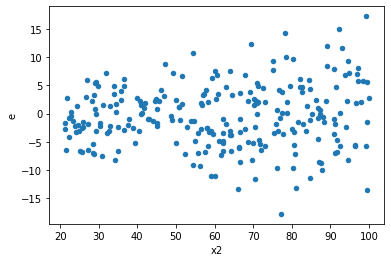

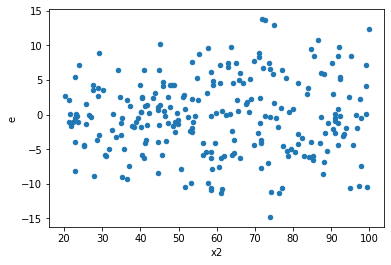

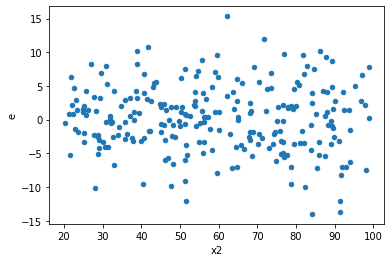

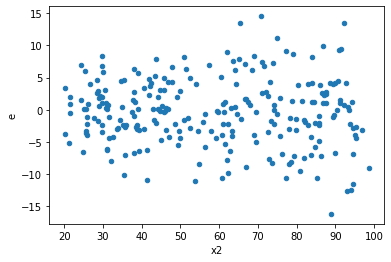

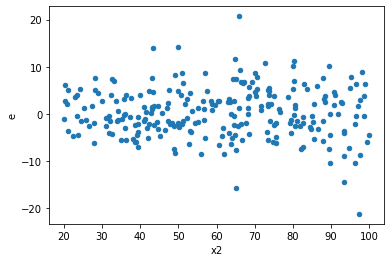

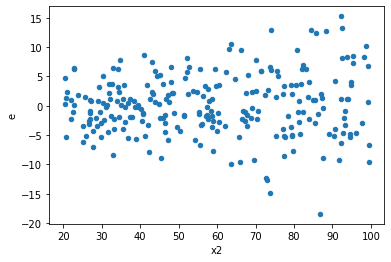

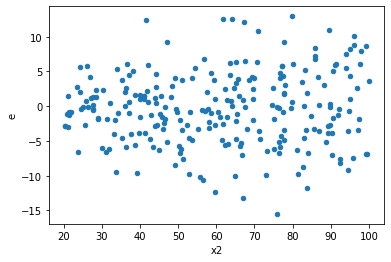

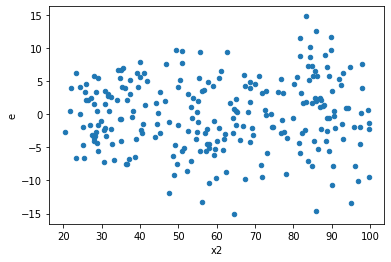

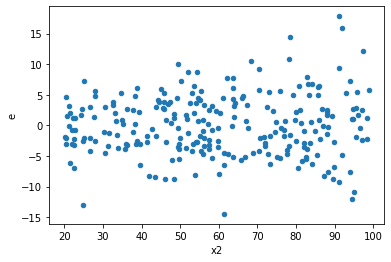

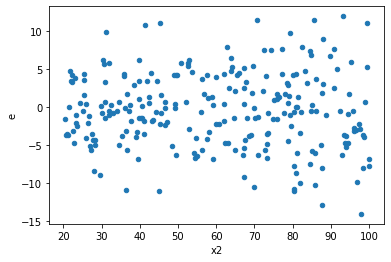

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,4164.314140527416,1658.7394845737604,43.378272297160585,17.27853629764334,2.5105293382447598,8.780248340611863e-06,0.9999956098758297,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,3795.6451212362763,1651.694547363048,39.53797001287788,17.20515153503175,2.2980309084970183,5.572232037387437e-05,0.9999721388398131,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,2848.5562154544327,1626.038371265554,29.67246057765034,16.937899700682852,1.751838250432791,0.006215797315710647,0.9968921013421447,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,3466.9904806982445,1578.9451101802242,36.11448417394005,16.447344897710668,2.19576377819905,0.00013605203459210458,0.999931973982704,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,2891.9580403333584,1879.0037748580435,30.12456292013915,19.57295598810462,1.539091128516675,0.03487461649126922,0.9825626917543654,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,4017.445397311919,1373.1181518898566,41.84838955533249,14.303314082186006,2.925782746213506,2.544812698346277e-07,0.9999998727593651,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3330.2246182219587,1529.3142018833628,34.6898397731454,15.930356269618363,2.17759346909926,0.00015943360972814347,0.9999202831951359,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,3318.1794649920234,2247.330158751832,34.564369427000244,23.409689153664917,1.476498436186582,0.0563923139017275,0.9718038430491363,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,3131.3966549005195,1719.22232633471,32.61871515521374,17.908565899319896,1.8214029721080285,0.0034606028198018723,0.9982696985900991,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,4164.314140527416,1658.7394845737604,43.378272297160585,17.27853629764334,2.5105293382447598,8.780248340611863e-06,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,3795.6451212362763,1651.694547363048,39.53797001287788,17.20515153503175,2.2980309084970183,5.572232037387437e-05,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,2848.5562154544327,1626.038371265554,29.67246057765034,16.937899700682852,1.751838250432791,0.006215797315710647,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,3466.9904806982445,1578.9451101802242,36.11448417394005,16.447344897710668,2.19576377819905,0.00013605203459210458,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,2891.9580403333584,1879.0037748580435,30.12456292013915,19.57295598810462,1.539091128516675,0.03487461649126922,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,4017.445397311919,1373.1181518898566,41.84838955533249,14.303314082186006,2.925782746213506,2.544812698346277e-07,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3330.2246182219587,1529.3142018833628,34.6898397731454,15.930356269618363,2.17759346909926,0.00015943360972814347,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,3318.1794649920234,2247.330158751832,34.564369427000244,23.409689153664917,1.476498436186582,0.0563923139017275,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,3131.3966549005195,1719.22232633471,32.61871515521374,17.908565899319896,1.8214029721080285,0.0034606028198018723,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    762
Reject001=1 : Homoscedasticity      238
Name: Result_test, dtype: int64